In [1]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/My Drive/SpringBoard/Sample Projects/Project Hymnal"

/content/drive/My Drive/SpringBoard/Sample Projects/Project Hymnal


# Importing csv file into pandas dataframe

In [5]:
df = pd.read_csv('./data/df.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56,57,58,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Function to display the full dataframe
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# Checking out dataframe

In [7]:
print_full(df.head(1).T)

                                                                      0
event_date                                   2020-11-07 00:00:00.000000
event_timestamp                              2020-11-08 02:15:18.108000
event_name                                                session_start
event_previous_timestamp                     2020-11-07 21:47:54.744000
event_bundle_sequence_id                                             13
event_server_timestamp_offset                                    754702
user_pseudo_id                         cb052c8ce7b261aecf783ce043089fb3
user_first_touch_timestamp                             1562977643627000
stream_id                                                    1440534155
platform                                                        ANDROID
device.category                                                  mobile
device.mobile_brand_name                                         Google
device.mobile_model_name                                        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10939 entries, 0 to 10938
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event_date                       10939 non-null  object 
 1   event_timestamp                  10939 non-null  object 
 2   event_name                       10939 non-null  object 
 3   event_previous_timestamp         10858 non-null  object 
 4   event_bundle_sequence_id         10939 non-null  int64  
 5   event_server_timestamp_offset    10939 non-null  int64  
 6   user_pseudo_id                   10939 non-null  object 
 7   user_first_touch_timestamp       10939 non-null  int64  
 8   stream_id                        10939 non-null  int64  
 9   platform                         10939 non-null  object 
 10  device.category                  10939 non-null  object 
 11  device.mobile_brand_name         10697 non-null  object 
 12  device.mobile_mode

### Convert selected columns to datetime

In [9]:
list1 = ['event_date', 'event_timestamp', 'event_previous_timestamp', 'user_first_touch_timestamp', 'first_open_time.timestamp', 'ga_session_number.timestamp', 'ga_session_id.timestamp']
for i in list1:
    df[i] = pd.to_datetime(df[i])

### Convert selected columns to category

In [10]:
objects = df.select_dtypes(include='object').columns.tolist()

In [11]:
for i in objects:
    df[i] = df[i].astype('category')

# Pandas Profiling

In [12]:
#pip install pandas-profiling[notebook,html] --upgrade
#pip install plotly --upgrade

In [13]:
### Disabled due to lag
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title = 'Pandas Profiling Report',explorative = True)
profile.to_notebook_iframe()
profile.to_file("./data/project_hymnal.html")

Output hidden; open in https://colab.research.google.com to view.

# A little analysis on data

- Which countries are my users mainly from?
- Which events are the most used ones?
- Which platform are users coming from?
- Which screen users spend time on?
- What are the likelihood a user will keep the app + condition?
- Growth rate of users

In [14]:
plt.style.use(['dark_background'])

### Looking at operating systems

In [15]:
df['device.operating_system_version'].value_counts().tail(5)

8.1.0     7
12.4.9    6
10.3.2    5
12.1.2    3
7.0       3
Name: device.operating_system_version, dtype: int64

Looking at the above stats, we can further discuss with the developer whether it is worth maintaining a compatible version of the application for devices that are too outdated.

### Inspecting device brand

In [16]:
# Breakdown on phone brandsof users
df['device.mobile_brand_name'].value_counts()

Apple       9882
Samsung      435
OnePlus      174
Google       102
Vivo          32
Xiaomi        20
Motorola      19
Huawei        14
LG            10
OPPO           7
Amazon         2
Name: device.mobile_brand_name, dtype: int64

### Testing out different visualization methods

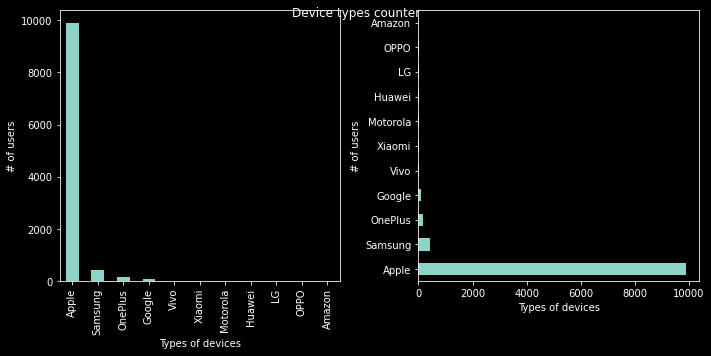

In [17]:
# Visual of mobile brand_name
fig = plt.figure(figsize=(10,5))
fig.suptitle('Device types counter')

ax = df['device.mobile_brand_name'].value_counts()

plt.subplot(1, 2, 1)
ax.plot.bar()
plt.xlabel('Types of devices');
plt.ylabel('# of users');

plt.subplot(1, 2, 2)
ax.plot.barh()
plt.xlabel('Types of devices');
plt.ylabel('# of users');

fig.tight_layout()

In [18]:
print(ax.tolist())

[9882, 435, 174, 102, 32, 20, 19, 14, 10, 7, 2]


In [19]:
df.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_previous_timestamp', 'event_bundle_sequence_id',
       'event_server_timestamp_offset', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform',
       'device.category', 'device.mobile_brand_name',
       'device.mobile_model_name', 'device.mobile_os_hardware_model',
       'device.operating_system', 'device.operating_system_version',
       'device.language', 'device.is_limited_ad_tracking',
       'device.time_zone_offset_seconds', 'geo.continent', 'geo.country',
       'geo.region', 'geo.city', 'geo.sub_continent', 'app_info.version',
       'app_info.firebase_app_id', 'app_info.install_source',
       'traffic_source.source', 'index1', 'first_open_time.value',
       'first_open_time.timestamp', 'ga_session_number.value',
       'ga_session_number.timestamp', 'ga_session_id.value',
       'ga_session_id.timestamp', 'firebase_event_origin_x',
       'firebase_event_origin_y', 'ga_session_id'

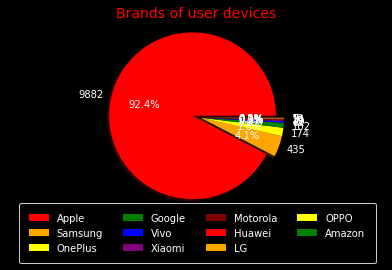

In [20]:
# Visualization of recommendation system
ax = df['device.mobile_brand_name'].value_counts()
colors = ['red','orange','yellow','green','blue','purple','maroon']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

ax.plot(kind='pie', fontsize=10, labels=ax, startangle=0, shadow=True, colors=colors, explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Brands of user devices', color='red', fontsize=14)
plt.ylabel('')
plt.legend(labels=ax.index, loc=[0.03,-0.3], ncol=4, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.tight_layout()
plt.show()

This information shows that the majority of users are on ios platform while the rest of the users are on android platform. This is helpful for the developer to know whether it is worth maintaining the app on both platforms.

### Inspecting device model sorted by device brand

In [21]:
# Shows a breakdown of phone model
print(df['device.mobile_model_name'].unique())
df['device.mobile_model_name'].value_counts().head()

['Pixel', 'GM1917', 'KFKAWI', NaN, 'CPH1853', ..., 'A5000', 'A5010', 'A6000', 'A6003', 'A6013']
Length: 71
Categories (70, object): ['Pixel', 'GM1917', 'KFKAWI', 'CPH1853', ..., 'A5010', 'A6000', 'A6003',
                          'A6013']


iPhone           1550
iPhone X         1250
iPad              813
iPhone 8 Plus     797
iPhone XR         757
Name: device.mobile_model_name, dtype: int64

<Figure size 1080x720 with 0 Axes>

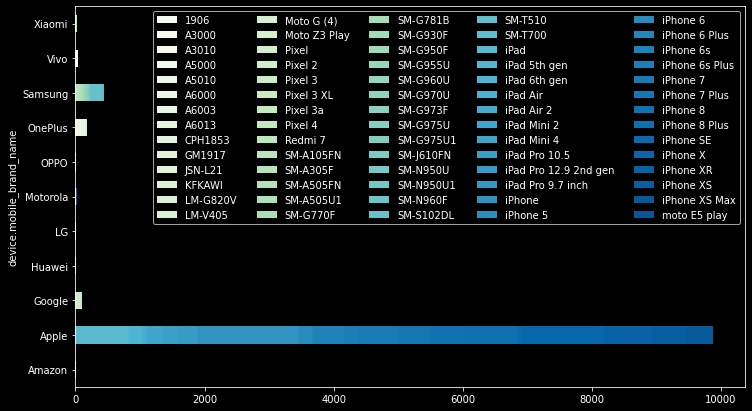

In [22]:
# Horizontal bar chart of device models sorted by brands
ax1 = df[['device.mobile_brand_name', 'device.mobile_model_name']].groupby(['device.mobile_brand_name','device.mobile_model_name'])['device.mobile_brand_name'].count().unstack('device.mobile_model_name')

plt.figure(figsize=(15,10))
colors = plt.cm.GnBu(np.linspace(0, 1, 75))
ax1.plot(kind='barh', stacked=True, figsize=(12,7), color=colors)
plt.legend(ncol=5, loc='best', bbox_to_anchor=(0, 0, 1, 1))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; y

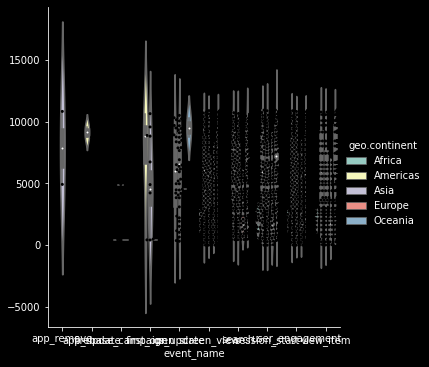

In [23]:
g = sns.catplot(x='event_name', y=df.index, hue='geo.continent', kind='violin', data=df)
sns.swarmplot(x='event_name', y=df.index, color='k', size=3, data=df, ax=g.ax)

In [24]:
#@title Default title text
# Interactive Treemaps
import plotly.express as px
ax2 = df[['device.mobile_brand_name', 'device.mobile_model_name','geo.country']].dropna()
ax2['counts'] = 1

# Display list of country names to pick from
print(ax2['geo.country'].cat.categories)
#ax2 = ax2.loc[ax2['geo.country'] == 'United States'] # Enable this line to search by country name
#ax2 = ax2[ax2['geo.country'] == ax2['geo.country'].cat.categories[0]] # Enable this line to search by category code
#colors = 'geo.country'
# add in color=colors, color_continuous_scale='RdBu', 

fig = px.treemap(ax2, path=['device.mobile_brand_name','device.mobile_model_name','geo.country'], values='counts', height=800, title='Device Brand --> Model --> Country')
fig.data[0].textinfo = 'label+text+value+current path'
fig.show()

Index(['Australia', 'Belize', 'Canada', 'China', 'Croatia', 'Denmark',
       'Ethiopia', 'Germany', 'Guam', 'Hong Kong', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Malaysia', 'New Zealand', 'Oman', 'Philippines',
       'Russia', 'Singapore', 'South Korea', 'Sweden', 'Taiwan', 'Thailand',
       'United Kingdom', 'United States', 'Vietnam'],
      dtype='object')


### Inspecting mobile platform of users

Firstly investigating the relationship between stream_id and platform columns

In [25]:
#Checking unique values in stream_id column
df.stream_id.unique()

array([1440534155, 1080202923])

Here I see that there are only 2 values, this could be because the dataframe only consist of 2 types of platforms

In [26]:
df.platform.unique()

['ANDROID', 'IOS']
Categories (2, object): ['ANDROID', 'IOS']

As hypothesized, the stream_id is based on the type of platform. Next, I want to know which stream_id belongs to which platform

In [27]:
df.stream_id.value_counts()

1080202923    10124
1440534155      815
Name: stream_id, dtype: int64

In [28]:
df.platform.value_counts()

IOS        10124
ANDROID      815
Name: platform, dtype: int64

Now, I can clearly see which stream_id represents which platform. This also shows us which platform is more dominantly used for this application. In this instance, the majority of users uses IOS platform.

In [29]:
# Comparing device.operating_system and platform values
set(np.where(df['device.operating_system'] == df['platform'], True, False))

{True}

Since the only unique value is True that means that both columns contains the same values for every rows.

In [30]:
df['app_info.install_source'].value_counts()

iTunes                       9882
com.android.vending           814
manual_install                242
com.sec.android.easyMover       1
Name: app_info.install_source, dtype: int64

# categorical search parameter

In [31]:
df_item = df[['item_category', 'item_subcategory', 'item_name','geo.continent','geo.country']].dropna()
df_item['counts'] = 1
df_item.head()

,item_category,item_subcategory,item_name,geo.continent,geo.country,counts
14,Union with Christ,One with Him,"One with Thee, Thou Son eternal",Americas,United States,1
37,Encouragement,For Fellowship with the Lord,Take time to behold Him,Americas,United States,1
38,Encouragement,For Fellowship with the Lord,"Take time to behold Him,",Americas,United States,1
39,Experience of Christ,His Humanity,"Fallen, in her condition",Americas,United States,1
40,Experience of Christ,His Humanity,"Fallen, in her condition",Americas,United States,1


In [32]:
#Treemaps
fig = px.treemap(df_item, path=['item_category', 'item_subcategory'], values='counts', title='Category-Subcategory')
fig.data[0].textinfo = 'label+text+value+current path'
fig.show()

In [33]:
fig2 = px.treemap(df_item, path=['item_subcategory', 'item_name'], values='counts', title='Subcategory-Item')
fig2.data[0].textinfo = 'label+text+value+current path'
fig2.show()

Output hidden; open in https://colab.research.google.com to view.

### Top search values

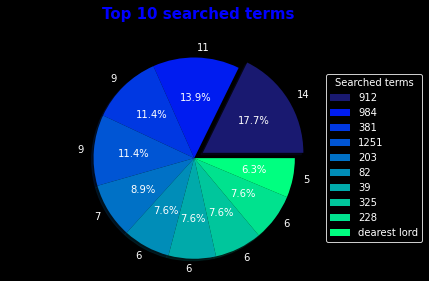

In [36]:
# Pie chart on top 10 highest search term
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
counts = df.search_term.value_counts().head(10)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', ]
ax1 = counts.plot(kind='pie', labels=df.search_term.value_counts(), fontsize=10, colors=colors, startangle=0, shadow=True, explode=explode, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 10 searched terms', y=1.1, fontsize=15, fontweight='bold', c='b')
plt.ylabel('')
plt.legend(title='Searched terms', labels=df.search_term.value_counts().index, bbox_to_anchor=(1.1, 0.5), fancybox=True, shadow=True, ncol=1, loc="right")
#plt.title('Top 10 searched terms with frequency label')
plt.tight_layout()
plt.show()

Based on the top 10 searched terms, I can clearly see that users prefer to search numerically.

### Recommendation adoption rate

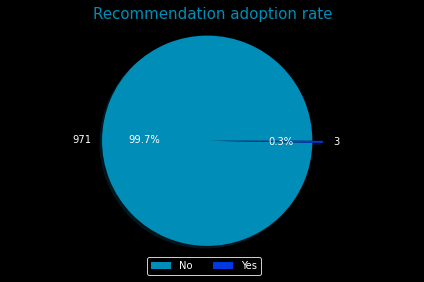

In [37]:
# Visualization of recommendation system
counts = df['recommended'].value_counts()
explode = (0.1, 0)
colors = ['#008DB8', '#0038E2']
ax1 = counts.plot(kind='pie', labels=df['recommended'].value_counts(), fontsize=10, startangle=0, shadow=True, colors=colors,  explode=explode, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.title('Recommendation adoption rate', color='#008DB8', fontsize=15)

labels = ['No', 'Yes']
plt.legend(labels=labels, bbox_to_anchor=(0.48, -0.1), fancybox=True, shadow=True, ncol=2, loc="lower center")
plt.tight_layout()
plt.show()

The recommendation system seems to be very underused. This calls for a need to improve the current recommendation model/system.

# Inspecting device language and country

In [38]:
# Displaying top 3 most popular language settings 
df['device.language'].value_counts().head(3)

en-us    5907
en-ph    1842
en-gb     397
Name: device.language, dtype: int64

In [39]:
df['geo.country'].value_counts().head(5)

United States     5487
Philippines       2126
United Kingdom     687
Canada             538
Thailand           452
Name: geo.country, dtype: int64

Looking at the stats above, it can be determined that the two major countries of user-base for this app comes from the US followed by the Phillipines. Here we can also see that the language settings on a device is a better gauge for determining the language of users that can be use for further development of the application. On the other hand, the geolocation of users can be use to determine concentration of users by continent or country.

In [72]:
# Language Treemap
df_lang = df[['device.language','geo.continent','geo.country']].dropna()
df_lang['counts'] = 1

fig = px.treemap(df_lang, path=['geo.continent','geo.country','device.language'], values='counts', title='Continent --> Country --> Language')
fig.data[0].textinfo = 'label+text+value+current path'
fig.show()

### Inspecting the user-base of this app

count    336.000000
mean      32.556548
std       45.053962
min        1.000000
25%        9.000000
50%       16.000000
75%       39.000000
max      386.000000
Name: user_pseudo_id, dtype: float64

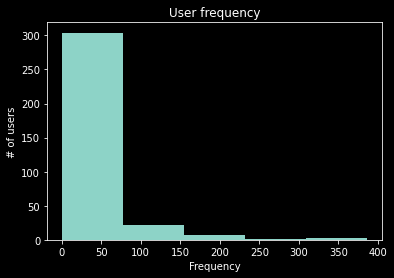

In [40]:
# Graphical analysis on user-base 
df.user_pseudo_id.value_counts().plot.hist(bins=5)
plt.xlabel('Frequency')
plt.ylabel('# of users')
plt.title('User frequency')
df.user_pseudo_id.value_counts().describe()

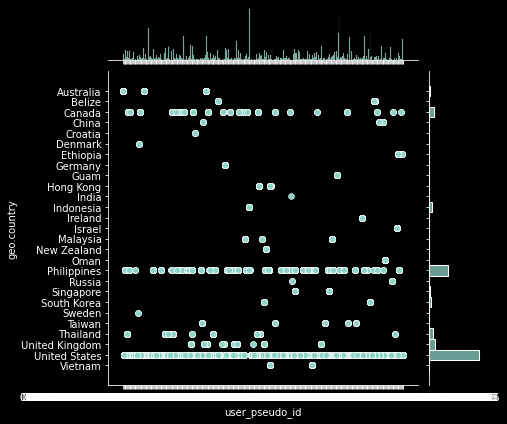

In [41]:
sns.jointplot(x='user_pseudo_id', y='geo.country', data=df)
plt.show()

### Understanding Definitions of events

In [42]:
df['event_name'].value_counts()

user_engagement      4497
screen_view          4070
view_item             974
search                802
session_start         522
os_update              57
first_open             10
firebase_campaign       3
app_update              2
app_remove              2
Name: event_name, dtype: int64

- user_engagement
    - periodically, while the app is in the foreground
- screen_view
    - when a screen transition occurs and any of the following criteria are met:
        - No screen was previously set
        - The new screen name differs from the previous screen name
        - The new screen-class name differs from the previous screen-class name
        - The new screen id differs from the previous screen id
- view_item
- search
- session_start
    - when a user engages the app or website
- os_update
    - when the device operating system is updated to a new version
    - The previous operating system version id is passed as a parameter
- first_open
    - the first time a user launches an app after installing or re-installing it
- firebase_campaign
    - when the app is launched with campaign parameters
- app_update
    - when the app is updated to a new version and launched again
    - The previous app version id is passed as a parameter.
- app_remove
    - when an application package is removed (uninstalled) from an Android device (Only Android)

# Creating geographical map of users

In [43]:
#pip install country_converter --upgrade
#pip install geopandas --upgrade

In [44]:
import country_converter as coco
from datetime import datetime, timedelta
import requests
import geopandas as gpd

cc = coco.CountryConverter()

### Setting up location dataframe

In [45]:
cc.valid_country_classifications

['Eora',
 'FAOcode',
 'GBDcode',
 'ISO2',
 'ISO3',
 'ISOnumeric',
 'UNcode',
 'name_official',
 'name_short',
 'regex']

In [46]:
# Creating location df
df_location = df[['event_date','user_pseudo_id','geo.continent','geo.sub_continent','geo.country','geo.region','geo.city']]

In [47]:
# Dropping null rows
df_location = df_location.dropna(axis=0)

# Renaming columns
#columns = {'geo.continent':'continent', 'geo.sub_continent':'sub_continent', 'geo.country':'country', 'geo.region':'region', 'geo.city':'city'}
#df_location = df_location.rename(columns=columns)

# Splitting up datetime columns into individual date columns
#df_location["day"] = df_location['event_date'].map(lambda x: x.day)
#df_location["month"] = df_location['event_date'].map(lambda x: x.month)
#df_location["year"] = df_location['event_date'].map(lambda x: x.year)

# Encoding user_pseudo_id column
#df_location['user'] = df_location['user_pseudo_id'].cat.codes.astype('category')

# Dropping original columns
#df_location = df_location.drop(columns=['event_date'])

In [48]:
# Converting country names to country codes
df_location['code'] = cc.convert(names=df_location['geo.country'], to='ISO2')

In [49]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10560 entries, 0 to 10938
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   event_date         10560 non-null  datetime64[ns]
 1   user_pseudo_id     10560 non-null  category      
 2   geo.continent      10560 non-null  category      
 3   geo.sub_continent  10560 non-null  category      
 4   geo.country        10560 non-null  category      
 5   geo.region         10560 non-null  category      
 6   geo.city           10560 non-null  category      
 7   code               10560 non-null  object        
dtypes: category(6), datetime64[ns](1), object(1)
memory usage: 354.3+ KB


In [50]:
df_location['user_pseudo_id'].value_counts().sum()

10560

In [51]:
df_location['population'] = df_location.groupby('geo.country')['user_pseudo_id'].transform('count')
df_location.head(2)

,event_date,user_pseudo_id,geo.continent,geo.sub_continent,geo.country,geo.region,geo.city,code,population
0,2020-11-07,cb052c8ce7b261aecf783ce043089fb3,Americas,Northern America,United States,Texas,Austin,US,5469
1,2020-11-07,cb052c8ce7b261aecf783ce043089fb3,Americas,Northern America,United States,Texas,Austin,US,5469


### Setting up Geopandas map shape

In [52]:
# Setting the path to the shapefile
SHAPEFILE = "/content/drive/My Drive/SpringBoard/Sample Projects/Project Hymnal/data/map_country/ne_10m_admin_0_countries.shp"


# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]

# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


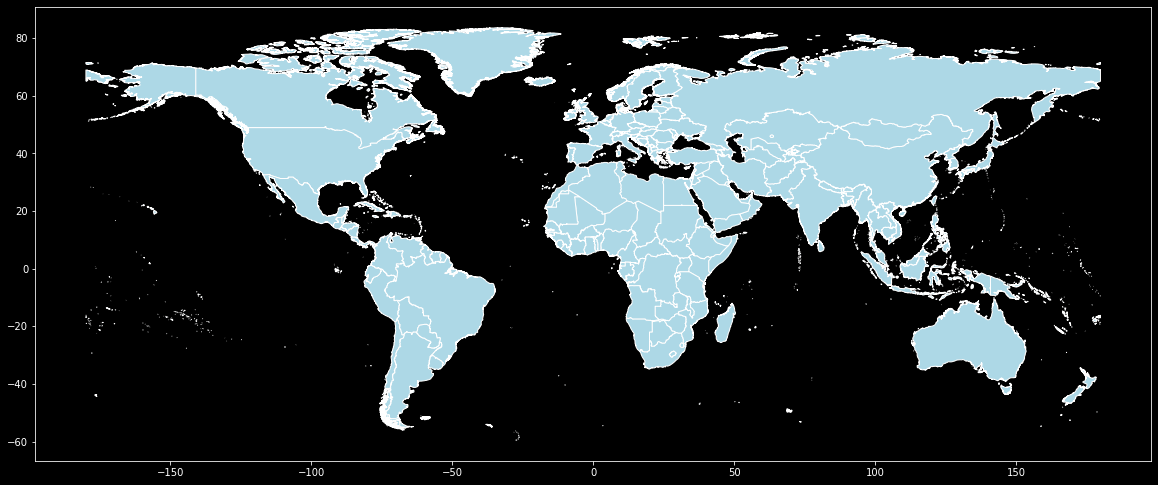

In [53]:
# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [54]:
# Next, we need to ensure that our data matches with the country codes. 
iso3_codes = geo_df['country'].to_list()

# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')

# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list

# Dropping countries for which the converter could not find a country code. 
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)

geo_df.head()

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


,country,country_code,geometry,iso2_code
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",BO
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",PE


### Merging dataframe data to shape of map

In [55]:
df_geo_merged = pd.merge(left=geo_df, right=df_location, how='left', left_on='iso2_code', right_on='code')

In [56]:
df_geo_merged.columns

Index(['country', 'country_code', 'geometry', 'iso2_code', 'event_date',
       'user_pseudo_id', 'geo.continent', 'geo.sub_continent', 'geo.country',
       'geo.region', 'geo.city', 'code', 'population'],
      dtype='object')

In [57]:
df_location = df_geo_merged.drop(['user_pseudo_id', 'geo.continent', 'geo.sub_continent', 'geo.country', 'geo.region', 'geo.city', 'code'], axis=1) 

In [58]:
df_location.head()

,country,country_code,geometry,iso2_code,event_date,population
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,2020-11-07,386.0
1,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,2020-11-07,386.0
2,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,2020-11-07,386.0
3,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,2020-11-07,386.0
4,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,2020-11-07,386.0


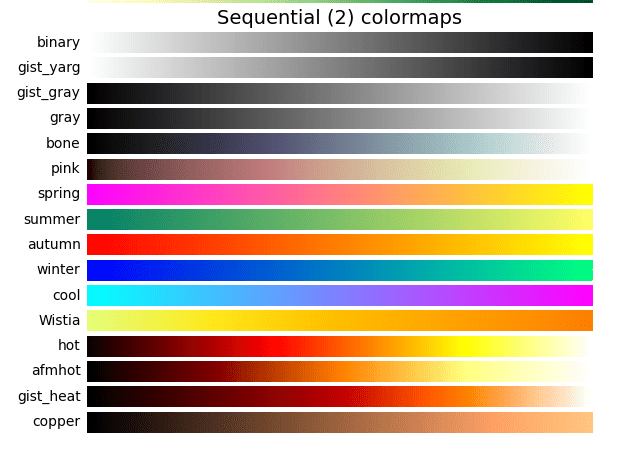

In [ ]:
# Failed to run due to low ram
title = 'Country Heatmap'
col = 'population'

vmin = df_location[col].min()
vmax = df_location[col].max()
cmap = 'viridis'

fig, ax = plt.subplots(1, figsize=(20,8))

ax.axis('off')
df_location.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Colorbar as legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

# Notes

user_pseudo_id is reset on reinstall
vendor_id - users can disable some ad tracking in iOS, wont be present for Android users. 

Note that if your iOS app does not have access to the Advertising Identifier on a user’s device, you will not be able to collect interests and demographic data in Firebase as the Vendor ID will be used instead.

### Reference Firebase analytics

- General
https://www.bounteous.com/insights/2017/10/12/google-analytics-firebase-reporting-introduction/

- Events
https://support.google.com/firebase/answer/9234069?visit_id=637527368990346049-1108460477&rd=1

- User Properties
https://support.google.com/firebase/answer/9268042?visit_id=637527368990346049-1108460477&rd=1

- Timestamp
https://stackoverflow.com/questions/53238994/firebase-bigquery-server-offset-time